In [187]:
import sklearn
import pandas as pd
import numpy as np
import datetime

In [188]:
df = pd.read_csv('../datasets/cars.csv', low_memory=False)

In [189]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [190]:
df.shape

(398, 9)

In [191]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [192]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [193]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].map(lambda x : float(x))
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['horsepower'] = df['horsepower'].map(lambda x : int(x))

In [194]:
df.rename(columns={'model year':'year'}, inplace=True)
df['year'].dtype

dtype('int64')

In [195]:
df['year'] = df['year'].map(lambda x : str(x))

In [196]:
df['year'] = df['year'].map(lambda x : pd.to_numeric('19' + x))

In [197]:
df.year.dtype

dtype('int64')

In [198]:
from datetime import datetime as dt

In [199]:
df['age'] = dt.now().year - df['year']
df.drop('year', axis=1, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car name,age
0,18.0,8,307.0,130,3504,12.0,1,chevrolet chevelle malibu,50
1,15.0,8,350.0,165,3693,11.5,1,buick skylark 320,50
2,18.0,8,318.0,150,3436,11.0,1,plymouth satellite,50
3,16.0,8,304.0,150,3433,12.0,1,amc rebel sst,50
4,17.0,8,302.0,140,3449,10.5,1,ford torino,50


In [200]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [212]:
df['origin'].replace({1:'US', 2:'Europe', 3:'Japan'}, inplace=True)

In [233]:
df.to_csv('../datasets/auto-mpg.csv')

In [234]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,43.989950
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,41.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#plt.rcParams['figure.figsize'] = [18,16]
#plt.figure(figsize=(8,6))
#df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
#plt.show()

<BarContainer object of 398 artists>

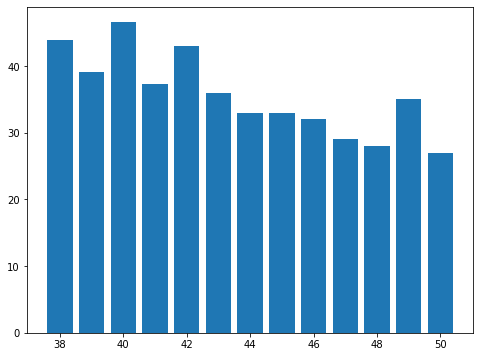

In [237]:
plt.figure(figsize=(8,6))
plt.bar('age', 'mpg', data=df)

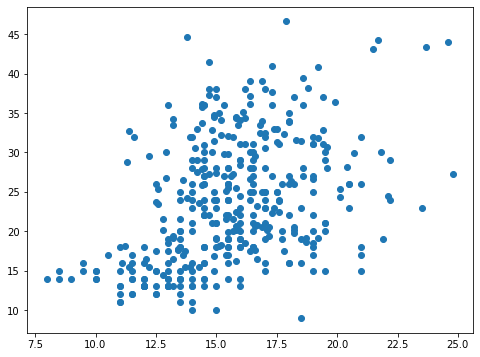

In [240]:
plt.figure(figsize=(8,6))
plt.scatter('acceleration', 'mpg', data=df)

In [244]:
df.select_dtypes(include=['int64', 'float64']).corr()['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.771543
weight         -0.831741
acceleration    0.420289
age            -0.579267
Name: mpg, dtype: float64

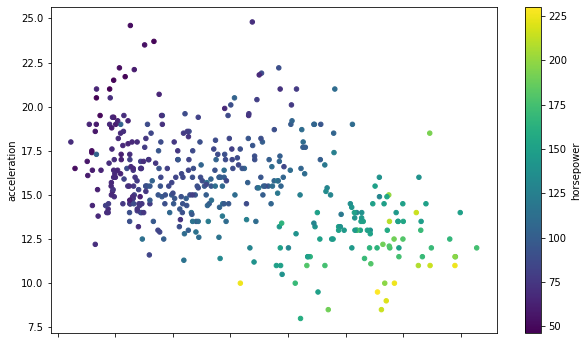

In [248]:
df.plot(kind='scatter', x='weight', y='acceleration', c='horsepower', cmap='viridis', figsize=(10,6))

In [250]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
origin           object
car name         object
age               int64
dtype: object

In [251]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car name,age
0,18.0,8,307.0,130,3504,12.0,US,chevrolet chevelle malibu,50
1,15.0,8,350.0,165,3693,11.5,US,buick skylark 320,50
2,18.0,8,318.0,150,3436,11.0,US,plymouth satellite,50
3,16.0,8,304.0,150,3433,12.0,US,amc rebel sst,50
4,17.0,8,302.0,140,3449,10.5,US,ford torino,50
